## 20180411 LectureNote

### Part I:Introduction to Larange Multiplier
- visualization for the constrained optimization problem
- numerical solution for the constrained optimization problem

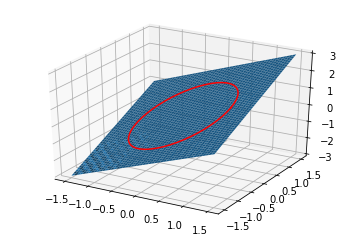

In [16]:
import numpy as np

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-')
plt.show()

# plt.savefig('lagrange-1.png')

In [17]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

from scipy.optimize import minimize

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               method='SLSQP', options={'disp': True})
print(res.x)

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,\
               constraints=cons, method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[ 2.  1.]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[ 1.00000009  1.        ]


### Part II:熱力學第二定律
- 溫度不可能自動從低流到高
- 熱力學系統的亂度越來越大
- 這兩種表述等價
- 熱力學函數(domain: phase space, we call it "state function" either.)
    - 熱非熱力學函數 而能量是
    - heat is a relative concept($\delta$Q), it is independent to the path
    
    $\oint \! \dfrac{\delta Q}{T} \, \mathrm{d} t \leq 0 $ (Clausius theorem)
- Macrostate(such as heat) vs Microstate(state)
    - Example. a system with binary states
- Additive(extensive) vs intensive
    - Example. Entropy is extensive
- State Function define as S($\Omega$)
    - S($\Omega$1$\Omega$2)=S($\Omega$1)S($\Omega$2)
    - S = $k_{B}$ln$\Omega$
    - S = $-k_{B} \sum p_i ln(p_i)$
    - Constraint: $\sum(p_i)=1$
    - $\rightarrow$ use Lagrangian to prove the above formulas are equivalent
- Micro Canonical Ensemble (能量完全沒有交換)
    - fixed temperature $\rightarrow$ E = $E$ (E) = $\sum E_i p_i$ (有能量交換沒有粒子交換) $\rightarrow$ 波茲曼分布
    - $\rightarrow$ minimize the free energy equilibrium cononical ensemble
    - $\rightarrow$ Partition and Boltzman distribution


### Part III: Speech Note

- Universality of the Random-Cluster Model (Li Jhih-Huang李志華)
    - interaction between particles (micro view)
    - physical parameters that vary (macro view) $\rightarrow$ phase transition
    - Universality Behavior: independent of the molecule and the lattice(晶格) (model setting here: rnadom-cluster model)

    - Graph:
        - V,E,$p$
        - Bernoulli Percolation(滲透) 
          - Here,$p$ :擦掉/不擦的機率(i.e. open/closed, configuration: $\omega$ belongs to $\{0,1\}^E$)
          - Bernoulli PErcolation measure
        - Rnadom-cluster model : 
          - q: cluster rate 
          - k($\omega$): # of connective subgraph
          - $P_RC (\omega) \propto P_perco q^{k(\omega)} \propto \Pi_{e,\omega_e} p_e \Pi(1-p_e)q^{k(\omega)}$
              - q=1, Bernoulli Percolation model
              - $Z^2 $, q $\geq$ 1 ,0 $\leq$ p $\leq$ 1 
              - property of connectiveness (visualization:p=0.55 幾乎佔滿空間)
              - $p_c$ while $q=1,p_c=0.5$
                  - $<p_c$, no infinite cluster(connective compoment)
                  - $>p_c$, infinite cluster
              - Continuous/discontinuous phase transition while q>=1
                  - Mixing property(equivalent to continuity)
                      - Relation with infinite-far position
                  - Result: 1 $\leq$ q $\leq$ 4 continuous q>4 discontinuous
         - Isoradial graph
             - A graph such that all the faces are circumscribed in circles of the same radius(所有點都在外接圓上)
             - Rhombus tiling(菱形覆蓋) easy to deal with(edge等長)
                 - Example : 六角/三角/方型網格
             - Discrete complex variate analysis
             - Theorem: There exist $f_q: [0,pi] \rightarrow [0,1]$ such that the parameters ($p_e = f_q(\theta_e)$),e $\in$ E are critical
                 - P_theta decreasing as theata increase
                 - Critical? 存在無限大連通元件
                 - Continuous for 1 $\leq$ q $\leq$ 4 discontinuous for q>4 (same but more genererlized conclusion)
         - How to choose $f_q$: star-triangle transformation
             - Triangle $\rightarrow$ 六角 $\rightarrow$ rectangle (rearrange of 菱形,3D cube append)
             - Small detour: series, Parallel Star-Triangle(電路拓樸)
                 - RC model: 化成單電阻電路
             - $f_q$ satisfies properties above : especially (probability of) connectiveness

## 20180418 LectureNote

Gibb's entropy formula

micro states: $\omega_\Omega$
prob: $p_\Omega$
constraint1:normalization

constraint2:expectation of E fixed

partition function Z 

alternative mothod to derive boltzman distribution:min free energy(Helmholtz)= E - TS

F = U − T S {\displaystyle F=U-TS\,} F=U-TS\,

其中U是系統的內能，T是溫度，S是熵

open system

constraint3: E(N)= sum(NiPi) fixed

Grand Cononical / Grand Partition Function

一種粒子的化學勢（chemical potential μ {\displaystyle \mu \,} \mu\,）代表在一個體系內加入一個該種粒子所需要的能量。

光子沒有守恆性( meu = 0, 玻色統計) 

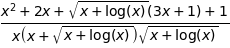

In [1]:
from sympy import init_printing, integrate, log, sqrt, symbols
init_printing()
x = symbols('x')
g = sqrt(x + log(x))
f = (x ** 2 + 2 * x + 1 + (3 * x + 1) * g) / (x * g * (x + g))
f

In [2]:
#Directed bond percolation
#p_c: 建立連結的機率
import random

In [11]:
random.seed(7)
pc= 0.5
cnt = 0
T = 4
Layer = 16

tree = [[0 for i in range(Layer)] for j in range(T)]
tree

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [64]:
# random.seed(7)
pc= 0.5
cnt = 0
T = 4
trial = 1000


def percolation(pc=pc,T=T,trial=trial):
    Layer=2**(T-1)
    mean = 0
    path = []
    tr = 0
    for n in range(trial):
        tr = n+1
        tree = [[0 for i in range(Layer)] for j in range(T)]
        tree[0][0] = 1
        cnt=0
        for t in range(T):
            for l,node in enumerate(tree[t]):

                if  (T-1)>t>0 and (Layer-1)>l>=0:
                    if tree[t-1][l]==1 or tree[t-1][l-1]==1:
                        leftnode = random.uniform(0,1) 
                        rtghtnode = random.uniform(0,1)
                        if leftnode>pc and tree[t+1][l]==0:
                            tree[t+1][l]=1 
                            cnt+=1
                        if rtghtnode>pc and tree[t+1][l]==0:
                            tree[t+1][l+1]=1
                            cnt+=1

                if t==0 and (Layer-1)>l>=0:
                    if (Layer-1)>l>=0:
                        leftnode = random.uniform(0,1) 
                        rtghtnode = random.uniform(0,1)
                        if leftnode>pc and t<T-1:
                            tree[t+1][l]=1
                            cnt+=1
                        if rtghtnode>pc and t<T-1:
                            tree[t+1][l+1]=1
                            cnt+=1
                            
        mean += cnt
        del(cnt)
        del(tree)
        mean= float(mean)/tr

#    num = np.sum([2**(n) for n in range(T)])
#    density = mean/num
#    path.append(density)
        path.append(mean)
    return path

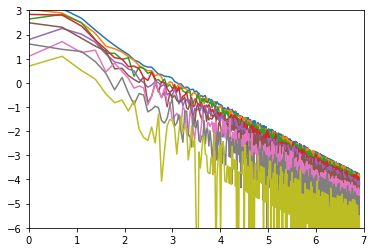

In [70]:
for i in range(1,10):
    path = percolation(pc=float(i)/10,T=T,trial=trial)
    plt.plot(np.log(np.array([x for x in range(1,1001)])),np.log(np.array(path)))
    plt.xlim(0,7)
    plt.ylim(-6,3)
plt.show()

#power law: ~= 0.62
# log density ~ log n

In [15]:
random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)

In [17]:
tree = [[0 for i in range(j+1)] for j in range(T)]
tree